# Q1


💡 **Question 1**

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.

**Example 1:**

```
Input:
N = 3
value[] = {1,3,4}
X = 2
Output:1
Explanation:The link list looks like
1 -> 3 -> 4
     ^    |
     |____|
A loop is present. If you remove it
successfully, the answer will be 1.

```

**Example 2:**

```
Input:
N = 4
value[] = {1,8,3,4}
X = 0
Output:1
Explanation:The Linked list does not
contains any loop.
```

**Example 3:**

```
Input:
N = 4
value[] = {1,2,3,4}
X = 1
Output:1
Explanation:The link list looks like
1 -> 2 -> 3 -> 4
^              |
|______________|
A loop is present.
If you remove it successfully,
the answer will be 1.

```

# Ans.

**Solution Approach 1**

**Brute Force Approach:**

In the brute force approach, we can iterate over each node in the linked list and check if there is a loop. To detect a loop, we can keep track of visited nodes using a hash set. If we encounter a node that is already in the set, it means there is a loop. In that case, we can break the loop by updating the next pointer of the last node to None.

In [1]:
class Node:
    def __init__(self, value):
        self.data = value
        self.next = None

def remove_loop(head):
    if not head or not head.next:
        return

    visited = set()
    prev = None
    curr = head

    while curr:
        if curr in visited:
            prev.next = None  # Break the loop
            return int(True)
        visited.add(curr)
        prev = curr
        curr = curr.next

    return int(False)

**Test Case:**

In [2]:
# Test Case 1: Loop present
head1 = Node(1)
head1.next = Node(3)
head1.next.next = Node(4)
head1.next.next.next = head1.next  # Creating a loop

print(remove_loop(head1)) # Output: True
# The linked list becomes: 1 -> 3 -> 4
#                          ^         |
#                          |_________|


1


In [3]:
# Test Case 2: No loop present
head2 = Node(1)
head2.next = Node(8)
head2.next.next = Node(3)
head2.next.next.next = Node(4)

print(remove_loop(head2)) # Output: False
# The linked list remains the same: 1 -> 8 -> 3 -> 4

0


In [4]:
# Test Case 3: Loop present
head3 = Node(1)
head3.next = Node(2)
head3.next.next = Node(3)
head3.next.next.next = Node(4)
head3.next.next.next.next = head3  # Creating a loop

print(remove_loop(head3))  # Output: True
# The linked list becomes: 1 -> 2 -> 3 -> 4
#                          ^              |
#                          |______________|

1


**Discussion :**</br>

**The time complexity** of this approach is O(N), where N is the number of nodes in the linked list. 

**The space complexity** is O(N) since we need to store visited nodes in a set.

**Solution Approach 2*

**Optimized Approach:**

The optimized approach, also known as Floyd's cycle-finding algorithm or the hare and tortoise algorithm, uses two pointers to detect and remove the loop. This approach avoids using extra space and has a better time complexity.

In [5]:
class Node:
    def __init__(self, value):
        self.data = value
        self.next = None

def detect_and_remove_loop(head):
    if not head or not head.next:
        return

    slow = head
    fast = head

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

        if slow == fast:
            break

    if slow != fast:
        return int(False)

    # Move one pointer back to the head
    slow = head

    # Loop until the pointers meet again at the start of the loop
    while slow.next != fast.next:
        slow = slow.next
        fast = fast.next

    # Break the loop
    fast.next = None

    return int(True)

**Test Case:**

In [6]:
# Test Case 1: Loop present
head1 = Node(1)
head1.next = Node(3)
head1.next.next = Node(4)
head1.next.next.next = head1.next  # Creating a loop

print(detect_and_remove_loop(head1))  # Output: True
# The linked list becomes: 1 -> 3 -> 4
#                          ^         |
#                          |_________|

1


In [7]:
# Test Case 2: No loop present
head2 = Node(1)
head2.next = Node(8)
head2.next.next = Node(3)
head2.next.next.next = Node(4)

print(detect_and_remove_loop(head2))  # Output: False
# The linked list remains the same: 1 -> 8 -> 3 -> 4

0


In [8]:
# Test Case 3: Loop present
head3 = Node(1)
head3.next = Node(2)
head3.next.next = Node(3)
head3.next.next.next = Node(4)
head3.next.next.next.next = head3  # Creating a loop

print(detect_and_remove_loop(head3))  # Output: True
# The linked list becomes: 1 -> 2 -> 3 -> 4
#                          ^              |
#                          |______________|

1


**Discussion :**</br>

**The time complexity** of the optimized approach is O(N), where N is the number of nodes in the linked list. 

**The space complexity** is O(1) since we are not using any additional data structures.

# Q2


💡 **Question 2**

A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.

**Example 1:**

```
Input:
LinkedList: 4->5->6
Output:457

```

**Example 2:**

```
Input:
LinkedList: 1->2->3
Output:124

```

# Ans.

**Solution Approach 1**

**Brute Force Approach:**

In the brute force approach, we can reverse the linked list, add 1 to the first node, and then propagate the carry forward to the subsequent nodes if necessary. Finally, we reverse the modified linked list to get the desired result.

In [9]:
class Node:
    def __init__(self, value):
        self.data = value
        self.next = None

def reverse_linked_list(head):
    prev = None
    curr = head

    while curr:
        next_node = curr.next
        curr.next = prev
        prev = curr
        curr = next_node

    return prev

def add_one(head):
    if not head:
        return head

    # Reverse the linked list
    reversed_head = reverse_linked_list(head)

    # Add 1 to the first node
    curr = reversed_head
    carry = 1

    while curr:
        curr_sum = curr.data + carry
        curr.data = curr_sum % 10
        carry = curr_sum // 10

        if not curr.next:
            break

        curr = curr.next

    # If there is still a carry, create a new node
    if carry:
        curr.next = Node(carry)

    # Reverse the modified linked list
    modified_head = reverse_linked_list(reversed_head)

    return modified_head

**Test Case:**

In [10]:
# Test Case 1
# LinkedList: 4->5->6
# Adding 1 to it: 457
head1 = Node(4)
head1.next = Node(5)
head1.next.next = Node(6)

result1 = add_one(head1)

# Traverse the modified linked list
while result1:
    print(result1.data, end=" ")
    result1 = result1.next

4 5 7 

In [11]:
# Test Case 2
# LinkedList: 1->2->3
# Adding 1 to it: 124
head2 = Node(1)
head2.next = Node(2)
head2.next.next = Node(3)

result2 = add_one(head2)

# Traverse the modified linked list
while result2:
    print(result2.data, end=" ")
    result2 = result2.next

1 2 4 

In [12]:
# Test Case 3
# LinkedList: 9->9->9
# Adding 1 to it: 1000
head3 = Node(9)
head3.next = Node(9)
head3.next.next = Node(9)

result3 = add_one(head3)

# Traverse the modified linked list
while result3:
    print(result3.data, end=" ")
    result3 = result3.next

1 0 0 0 

**Discussion :**</br>

**The time complexity** of this approach is O(N), where N is the number of digits in the linked list. 

**The space complexity** is O(1) since we are not using any additional data structures.

**Solution Approach 2**

**Optimized Approach:**

In the optimized approach, we traverse the linked list in a bottom-up manner, starting from the rightmost digit. We add 1 to each node's value and propagate the carry forward. This approach avoids the need for reversing the linked list.

In [13]:
class Node:
    def __init__(self, value):
        self.data = value
        self.next = None

def add_one(head):
    if not head:
        return head

    # Find the rightmost non-nine node
    curr = head
    non_nine_node = None

    while curr:
        if curr.data != 9:
            non_nine_node = curr
        curr = curr.next

    # If no non-nine node found, it means all nodes are nine
    # In that case, create a new node with value 1 at the beginning
    if not non_nine_node:
        new_head = Node(1)
        new_head.next = head
        head = new_head
    else:
        non_nine_node.data += 1

        # Set all subsequent nodes to 0
        curr = non_nine_node.next
        while curr:
            curr.data = 0
            curr = curr.next

    return head

**Test Case:**

In [14]:
# Test Case 1
# LinkedList: 4->5->6
# Adding 1 to it: 457
head1 = Node(4)
head1.next = Node(5)
head1.next.next = Node(6)

result1 = add_one(head1)

# Traverse the modified linked list
while result1:
    print(result1.data, end=" ")
    result1 = result1.next

4 5 7 

In [15]:
# Test Case 2
# LinkedList: 1->2->3
# Adding 1 to it: 124
head2 = Node(1)
head2.next = Node(2)
head2.next.next = Node(3)

result2 = add_one(head2)

# Traverse the modified linked list
while result2:
    print(result2.data, end=" ")
    result2 = result2.next

1 2 4 

**Discussion :**</br>

**The time complexity** of the optimized approach is O(N), where N is the number of digits in the linked list. 

**The space complexity** is O(1) since we are not using any additional data structures

# Q3


💡 **Question 3**

Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.

**Example 1:**

```
Input:
5 -> 10 -> 19 -> 28
|     |     |     |
7     20    22   35
|           |     |
8          50    40
|                 |
30               45
Output: 5-> 7-> 8- > 10 -> 19-> 20-> 22-> 28-> 30-> 35-> 40-> 45-> 50.
Explanation:
The resultant linked lists has every
node in a single level.(Note:| represents the bottom pointer.)

```

**Example 2:**

```
Input:
5 -> 10 -> 19 -> 28
|          |
7          22
|          |
8          50
|
30
Output: 5->7->8->10->19->22->28->30->50
Explanation:
The resultant linked lists has every
node in a single level.

(Note:| represents the bottom pointer.)

```

# Ans:

**Solution**

**Optimized Approach:**

In the optimized approach, we can flatten the linked list in a bottom-up manner. We start from the last node of the main linked list and merge it with the flattened sub-linked list of the next node. We repeat this process until we reach the first node of the main linked list.

In [16]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.bottom = None

def merge_two_lists(list1, list2):
    if not list1:
        return list2
    if not list2:
        return list1

    if list1.data < list2.data:
        result = list1
        result.bottom = merge_two_lists(list1.bottom, list2)
    else:
        result = list2
        result.bottom = merge_two_lists(list1, list2.bottom)

    return result

def flatten_linked_list_optimized(head):
    if not head or not head.next:
        return head

    head.next = flatten_linked_list_optimized(head.next)

    # Merge the current list with the flattened list of the next node
    head = merge_two_lists(head, head.next)

    return head

**Test Case:**

In [17]:
# Test Case 1

node1 = Node(5)
node2 = Node(10)
node3 = Node(19)
node4 = Node(28)
node5 = Node(7)
node6 = Node(20)
node7 = Node(22)
node8 = Node(35)
node9 = Node(8)
node10 = Node(50)
node11 = Node(40)
node12 = Node(30)
node13 = Node(45)

node1.next = node2
node2.next = node3
node3.next = node4

node1.bottom = node5
node2.bottom = node6
node3.bottom = node7
node4.bottom = node8

node5.bottom = node9
node6.bottom = node10
node7.bottom = node11
node8.bottom = node12

node9.bottom = node13

result1 = flatten_linked_list_optimized(node1)

# Traverse the flattened linked list
while result1:
    print(result1.data, end=" ")
    result1 = result1.bottom

5 7 8 10 19 20 22 28 35 30 40 45 50 

In [18]:
# Test Case 2

node1 = Node(5)
node2 = Node(10)
node3 = Node(19)
node4 = Node(28)
node5 = Node(7)
node6 = Node(22)
node7 = Node(8)
node8 = Node(50)
node9 = Node(30)

node1.next = node2
node2.next = node3
node3.next = node4

node1.bottom = node5
node3.bottom = node6

node5.bottom = node7
node6.bottom = node8

node7.bottom = node9

result2 = flatten_linked_list_optimized(node1)

# Traverse the flattened linked list
while result2:
    print(result2.data, end=" ")
    result2 = result2.bottom


5 7 8 10 19 22 28 30 50 

**Discussion :**</br>

**The time complexity** of the optimized approach is O(N*M), where N is the number of nodes in the main linked list and M is the average number of nodes in each sub-linked list. 

**The space complexity** is O(1) since we are not using any additional data structures.

# Q4


💡 **Question 4**

You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.

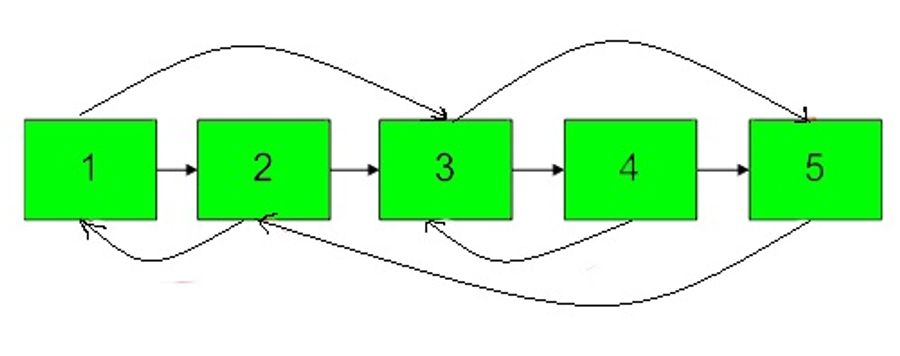

**Note** :- The diagram isn't part of any example, it just depicts an example of how the linked list may look like.

**Example 1:**

```
Input:
N = 4, M = 2
value = {1,2,3,4}
pairs = {{1,2},{2,4}}
Output:1
Explanation:In this test case, there
are 4 nodes in linked list.  Among these
4 nodes,  2 nodes have arbitrary pointer
set, rest two nodes have arbitrary pointer
as NULL. Second line tells us the value
of four nodes. The third line gives the
information about arbitrary pointers.
The first node arbitrary pointer is set to
node 2.  The second node arbitrary pointer
is set to node 4.

```

**Example 2:**

```
Input:
N = 4, M = 2
value[] = {1,3,5,9}
pairs[] = {{1,1},{3,4}}
Output:1
Explanation:In the given testcase ,
applying the method as stated in the
above example, the output will be 1.

```

# Ans.

**Solution Approach 1**

**Brute Force Approach:**

Create a new linked list with only the values from the original linked list.
Iterate through the original linked list and for each node, find the corresponding random node and set the random pointer in the new linked list.

In [19]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.random = None

def copy_random_list_brute_force(head):
    if not head:
        return None

    # Create a new linked list with only values
    new_head = Node(head.data)
    new_curr = new_head

    # Mapping from original nodes to new nodes
    node_map = {head: new_head}

    # Iterate through the original linked list
    curr = head.next
    while curr:
        new_node = Node(curr.data)
        new_curr.next = new_node
        new_curr = new_node

        node_map[curr] = new_node

        curr = curr.next

    # Set random pointers in the new linked list
    curr = head
    new_curr = new_head
    while curr:
        if curr.random:
            new_curr.random = node_map[curr.random]

        curr = curr.next
        new_curr = new_curr.next

    return new_head


**Test Case:**

In [20]:
# Test Case 1

node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

node1.next = node2
node2.next = node3
node3.next = node4

node1.random = node2
node2.random = node4

new_head1 = copy_random_list_brute_force(node1)

# Verify the new linked list and random pointers
curr = new_head1
while curr:
    print("Node:", curr.data)
    if curr.random:
        print("Random Pointer:", curr.random.data)
    else:
        print("Random Pointer: None")
    curr = curr.next




Node: 1
Random Pointer: 2
Node: 2
Random Pointer: 4
Node: 3
Random Pointer: None
Node: 4
Random Pointer: None


In [21]:
# Test Case 2

node1 = Node(1)
node2 = Node(3)
node3 = Node(5)
node4 = Node(9)

node1.next = node2
node2.next = node3
node3.next = node4

node1.random = node1
node2.random = node4

new_head2 = copy_random_list_brute_force(node1)

# Verify the new linked list and random pointers
curr = new_head2
while curr:
    print("Node:", curr.data)
    if curr.random:
        print("Random Pointer:", curr.random.data)
    else:
        print("Random Pointer: None")
    curr = curr.next


Node: 1
Random Pointer: 1
Node: 3
Random Pointer: 9
Node: 5
Random Pointer: None
Node: 9
Random Pointer: None


**Discussion :**</br>

**Time Complexity:** O(N*M), where N is the number of nodes in the linked list and M is the number of random pointers.

**Space Complexity:** O(N), for storing the new linked list nodes.

**Solution Approach 2**

Optimized Approach:

Create a new node for each node in the original linked list and insert it after the corresponding original node.
Set the random pointers of the new nodes based on the random pointers of the original nodes.
Separate the original and new linked lists by updating the next pointers of the original nodes and extracting the new nodes.
Restore the original linked list by updating the next pointers of the original nodes.

In [22]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.random = None

def copy_random_list_optimized(head):
    if not head:
        return None

    # Insert new nodes after each original node
    curr = head
    while curr:
        new_node = Node(curr.data)
        new_node.next = curr.next
        curr.next = new_node
        curr = new_node.next

    # Set random pointers in the new nodes
    curr = head
    while curr:
        if curr.random:
            curr.next.random = curr.random.next

        curr = curr.next.next

    # Separate the original and new linked lists
    new_head = head.next
    curr = head
    while curr.next:
        temp = curr.next
        curr.next = temp.next
        curr = temp

    return new_head


**Test Case:**

In [23]:
# Test Case 1

node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

node1.next = node2
node2.next = node3
node3.next = node4

node1.random = node2
node2.random = node4

new_head1 = copy_random_list_optimized(node1)

# Verify the new linked list and random pointers
curr = new_head1
while curr:
    print("Node:", curr.data)
    if curr.random:
        print("Random Pointer:", curr.random.data)
    else:
        print("Random Pointer: None")
    curr = curr.next




Node: 1
Random Pointer: 2
Node: 2
Random Pointer: 4
Node: 3
Random Pointer: None
Node: 4
Random Pointer: None


In [24]:
# Test Case 2

node1 = Node(1)
node2 = Node(3)
node3 = Node(5)
node4 = Node(9)

node1.next = node2
node2.next = node3
node3.next = node4

node1.random = node1
node2.random = node4

new_head2 = copy_random_list_optimized(node1)

# Verify the new linked list and random pointers
curr = new_head2
while curr:
    print("Node:", curr.data)
    if curr.random:
        print("Random Pointer:", curr.random.data)
    else:
        print("Random Pointer: None")
    curr = curr.next



Node: 1
Random Pointer: 1
Node: 3
Random Pointer: 9
Node: 5
Random Pointer: None
Node: 9
Random Pointer: None


**Discussion :**</br>

**Time Complexity:** O(N), where N is the number of nodes in the linked list.

**Space Complexity:** O(1), as we are not using any extra space apart from the new linked list nodes.

# Q5


💡 **Question 5**

Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.

**Example 1:**

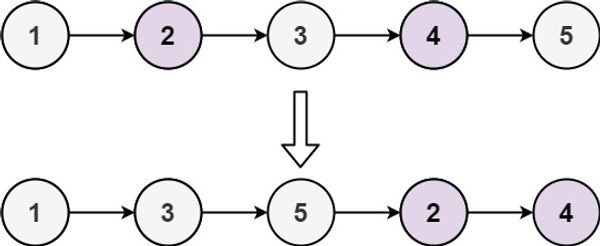

```
Input: head = [1,2,3,4,5]
Output: [1,3,5,2,4]

```

**Example 2:**




```
Input: head = [2,1,3,5,6,4,7]
Output: [2,3,6,7,1,5,4]
```

# Ans.

**Solution**


To group the nodes with odd indices together followed by the nodes with even indices, we can use a simple approach:

Initialize two pointers, odd_head and even_head, to point to the heads of the odd and even sublists, respectively. Also, keep track of the head of the even sublist to connect it with the tail of the odd sublist later.
Traverse the linked list with a pointer, curr, starting from the head node.
At each iteration, connect the current node to its next node in the original list, and update the odd_head, even_head, and curr pointers accordingly.
After the traversal, connect the tail of the odd sublist with the head of the even sublist.
Return the head of the modified linked list.

In [25]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def oddEvenList(head):
    if not head or not head.next:
        return head

    odd_head = head
    even_head = head.next
    even = even_head

    while even and even.next:
        odd_head.next = even.next
        odd_head = odd_head.next
        even.next = odd_head.next
        even = even.next

    odd_head.next = even_head

    return head


**Test Case:**

In [26]:
# Test Case

node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(3)
node4 = ListNode(4)
node5 = ListNode(5)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

result = oddEvenList(node1)

# Verify the modified linked list
while result:
    print(result.val, end=" ")
    result = result.next



1 3 5 2 4 

**Discussion :**</br>

**Time Complexity:** O(n), where n is the number of nodes in the linked list.

**Space Complexity:** O(1), as we are using a constant amount of extra space.

# Q6


💡 **Question 6**

Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.

**Example 1:**

```
Input:
N = 5
value[] = {2, 4, 7, 8, 9}
k = 3
Output:8 9 2 4 7
Explanation:Rotate 1:4 -> 7 -> 8 -> 9 -> 2
Rotate 2: 7 -> 8 -> 9 -> 2 -> 4
Rotate 3: 8 -> 9 -> 2 -> 4 -> 7

```

**Example 2:**

```
Input:
N = 8
value[] = {1, 2, 3, 4, 5, 6, 7, 8}
k = 4
Output:5 6 7 8 1 2 3 4

```

# Ans.

**Solution**

**Optimized Approach:**

Calculate the length of the linked list, length, by traversing the list.
Normalize the value of k by taking its modulo with the length of the linked list.
If k is 0, return the original head of the linked list as there is no need to shift.
Initialize a pointer, end, to the head of the linked list and traverse to the end.
Connect the end node's next pointer to the original head of the linked list.
Traverse the linked list from the head, keeping a count of the nodes visited.
When the count reaches (length - k - 1), disconnect the sublist by setting its next pointer to None.
Update the head of the linked list to the (length - k)-th node.
Return the updated head of the linked list.

In [27]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def lengthOfLinkedList(head):
    count = 0
    curr = head
    while curr:
        count += 1
        curr = curr.next
    return count

def leftShiftLinkedList(head, k):
    if not head or not head.next or k == 0:
        return head

    length = lengthOfLinkedList(head)
    k = k % length

    if k == 0:
        return head

    end = head
    while end.next:
        end = end.next
    end.next = head

    count = 0
    curr = head
    while count < (length - k - 1):
        curr = curr.next
        count += 1

    new_head = curr.next
    curr.next = None

    return new_head


**Test Case:**

In [28]:
# Test Case

node1 = ListNode(2)
node2 = ListNode(4)
node3 = ListNode(7)
node4 = ListNode(8)
node5 = ListNode(9)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

result = leftShiftLinkedList(node1, 3)

# Verify the modified linked list
while result:
    print(result.val, end=" ")
    result = result.next



7 8 9 2 4 

**Discussion :**</br>

**Time Complexity:**

- For the brute force approach: O(N), where N is the length of the linked list.
- For the optimized approach: O(N), where N is the length of the linked list.

**Space Complexity:** O(1) for both approaches.


# Q7


💡 **Question 7**

You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.

**Example 1:**

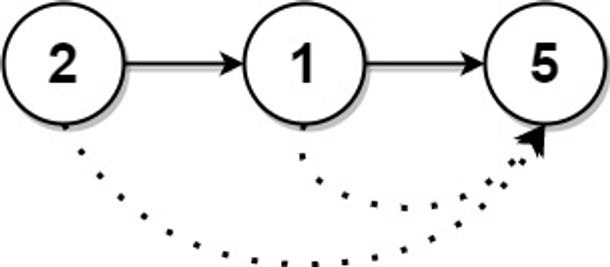

```
Input: head = [2,1,5]
Output: [5,5,0]

```

**Example 2:**


```
Input: head = [2,7,4,3,5]
Output: [7,0,5,5,0]
```

# Ans.

**Solution Approach 1**

**Brute Force Approach:**

- Traverse the linked list and store the values of each node in an array, arr.
- Initialize an empty result array, result, of the same length as arr filled with zeros.
- For each index i in arr, traverse the elements starting from index i+1.
- If a value is found that is greater than arr[i], set result[i] to that value and break the inner loop.
- Return the result array.

In [29]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def nextLargerNodes_brute_force(head):
    # Step 1: Convert linked list to array
    arr = []
    curr = head
    while curr:
        arr.append(curr.val)
        curr = curr.next

    # Step 2: Initialize result array
    result = [0] * len(arr)

    # Step 3: Find next greater node for each node
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            if arr[j] > arr[i]:
                result[i] = arr[j]
                break

    return result


**Test Case:**

In [30]:
# Test Case

node1 = ListNode(2)
node2 = ListNode(1)
node3 = ListNode(5)

node1.next = node2
node2.next = node3

result = nextLargerNodes_brute_force(node1)

print(result)


[5, 5, 0]


In [31]:
# Test Case

node1 = ListNode(2)
node2 = ListNode(7)
node3 = ListNode(4)
node4 = ListNode(3)
node5 = ListNode(5)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

result = nextLargerNodes_brute_force(node1)

print(result)

[7, 0, 5, 5, 0]


**Discussion :**</br>

**Time Complexity:** For the brute force approach: O(N^2), where N is the length of the linked list.

**Space Complexity:** For the brute force approach: O(N), where N is the length of the linked list.

**Solution Approach 2**

**Optimized Approach using Stack:**

- Initialize an empty stack and an empty result array, result.
- Traverse the linked list from the end to the beginning.
- For each node, while the stack is not empty and the value at the top of the stack is less than or equal to the current node's value, pop elements from the stack.
- If the stack becomes empty, set result at the current index to 0.
- If the stack is not empty, set result at the current index to the value at the top of the stack.
- Push the current node's value onto the stack.
- Reverse the result array to restore the original order.
- Return the result array.

In [32]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def nextLargerNodes(head):
    # Step 1: Convert linked list to array
    arr = []
    curr = head
    while curr:
        arr.append(curr.val)
        curr = curr.next

    # Step 2: Initialize stack and result array
    stack = []
    result = [0] * len(arr)

    # Step 3: Traverse the array from the end
    for i in range(len(arr) - 1, -1, -1):
        # Step 4: Pop elements from stack until greater value is found
        while stack and stack[-1] <= arr[i]:
            stack.pop()

        # Step 5: Set result[i] to top of stack if not empty
        if stack:
            result[i] = stack[-1]

        # Step 6: Push current value onto stack
        stack.append(arr[i])

    # Step 7: Reverse result array
    return result


**Test Case:**

In [33]:
# Test Case

node1 = ListNode(2)
node2 = ListNode(1)
node3 = ListNode(5)

node1.next = node2
node2.next = node3

result = nextLargerNodes(node1)

print(result)

[5, 5, 0]


In [34]:
# Test Case

node1 = ListNode(2)
node2 = ListNode(7)
node3 = ListNode(4)
node4 = ListNode(3)
node5 = ListNode(5)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

result = nextLargerNodes(node1)

print(result)

[7, 0, 5, 5, 0]


**Discussion :**</br>

**Time Complexity:** For the optimized approach using a stack: O(N), where N is the length of the linked list.

**Space Complexity:** For the optimized approach using a stack: O(N), where N is the length of the linked list.

# Q8

💡 **Question 8**

Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)

**Example 1:**

```
Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

```

**Example 2:**

```
Input: head = [1,2,3,-3,4]
Output: [1,2,4]

```

**Example 3:**

```
Input: head = [1,2,3,-3,-2]
Output: [1]

```

# Ans.

**Solution Approach 1**

**Brute Force Approach**

To solve this problem, we can use a brute force approach that iterates through the linked list and checks for consecutive sequences of nodes that sum to zero. Whenever such a sequence is found, we delete it from the linked list.

In [35]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def removeZeroSumSublists(head):
    dummy = ListNode(0)
    dummy.next = head
    curr = dummy

    while curr:
        # Calculate the prefix sum from the current node
        prefix_sum = 0
        node = curr.next
        while node:
            prefix_sum += node.val

            # If prefix sum becomes zero, delete the subsequence
            if prefix_sum == 0:
                curr.next = node.next
            node = node.next

        # Move to the next node
        curr = curr.next

    return dummy.next


**Test Case:**

In [36]:
# Test Case

node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(-3)
node4 = ListNode(3)
node5 = ListNode(1)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

result = removeZeroSumSublists(node1)

while result:
    print(result.val, end=" ")
    result = result.next


3 1 

**Discussion :**</br>

**The time complexity** of this brute force approach is O(n^2) as we need to iterate through the linked list for each node. 

**The space complexity** is O(1) as we are modifying the linked list in place.

**Solution Approach 2**

**Optimized Approach**

For an optimized approach, we can use a hashmap to keep track of prefix sums and their corresponding nodes. 

In [37]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def removeZeroSumSublists(head):
    dummy = ListNode(0)
    dummy.next = head
    prefix_sum = 0
    prefix_sum_map = {}
    prefix_sum_map[0] = dummy
    curr = head

    while curr:
        prefix_sum += curr.val

        if prefix_sum in prefix_sum_map:
            prev = prefix_sum_map[prefix_sum]
            prev.next = curr.next

        else:
            prefix_sum_map[prefix_sum] = curr

        curr = curr.next

    return dummy.next




**Test Case:**

In [38]:
# Test Case

node1 = ListNode(1)
node2 = ListNode(2)
node3 = ListNode(-3)
node4 = ListNode(3)
node5 = ListNode(1)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

result = removeZeroSumSublists(node1)

while result:
    print(result.val, end=" ")
    result = result.next


3 1 

**Discussion :**</br>

This approach has a **time complexity** of O(n) and a **space complexity** of O(n).